# Test

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.5.4 |Anaconda custom (64-bit)| (default, Nov 20 2017, 18:44:38) 
[GCC 7.2.0]
pandas version: 0.22.0
matplotlib version: 2.1.2
NumPy version: 1.14.0
SciPy version: 1.0.0
IPython version: 6.2.1
scikit-learn version: 0.19.1


In [2]:
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)


/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensorflow: 1.5.0


In [3]:
#Import library

#import tensorflow.contrib.learn as skflow
import tensorflow.contrib.learn as learn
from sklearn import datasets, metrics
from sklearn import cross_validation

#Load dataset

iris = datasets.load_iris()
x_train, x_test, y_train, y_test = cross_validation.train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Feature columns is required for new versions
feature_columns = learn.infer_real_valued_columns_from_input(x_train)

#Linear classifier

classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=3,model_dir='/tmp/tf/linear/')
classifier.fit(x_train, y_train, steps=200, batch_size=32)
score = metrics.accuracy_score(y_test, list(classifier.predict(x_test, as_iterable=True)))
#score = metrics.accuracy_score(y_test, list(classifier.predict(x_test)))
print("Accuracy: %f" % score)
#
iris_predictions = list(classifier.predict(x_test, as_iterable=True))
score = metrics.accuracy_score(y_test, iris_predictions)
print("Accuracy: %f" % score)
#

#Multi layer perceptron

classifier = learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], 
                                  n_classes=3,model_dir='/tmp/tf/mlp/')
classifier.fit(x_train, y_train, steps=200)

score = metrics.accuracy_score(y_test, list(classifier.predict(x_test)))
print("Accuracy: %f" % score)

#classifier = skflow.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=3,model_dir='/tmp/tf_examples/test/')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_task_id': 0, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_log_step_count_steps': 100, '_model_dir': '/tmp/tf/linear/', '_save_checkpoints_secs': 600, '_master': '', '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8766e16400>, '_session_config': None, '_num_ps_replicas': 0}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf/linear/model.ckpt-200
INFO:tensorflow:Saving checkpoints for 201 into /tmp/tf/linear/model.ckpt.
INFO:tensorflow:loss = 0.33740604, step = 201
INFO:tensorflow:global_step/sec: 1448.36
INFO:tensorflow:loss = 0.21875843, step = 301 (0.070 sec)
INFO:tensorflow:Saving checkpoints for 400 into /tmp/tf/

In [4]:
##########################################################
#import tensorflow as tf
#from tensorflow.contrib import skflow
#import tensorflow.contrib.learn.python.learn as learn
import tensorflow.contrib.learn as learn
from sklearn import datasets, metrics

iris = datasets.load_iris()
feature_columns = learn.infer_real_valued_columns_from_input(iris.data)
classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3, feature_columns=feature_columns)
classifier.fit(iris.data, iris.target, steps=200, batch_size=32)
iris_predictions = list(classifier.predict(iris.data, as_iterable=True))
score = metrics.accuracy_score(iris.target, iris_predictions)
print("Accuracy: %f" % score)
##########################################################

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_task_id': 0, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmp9jqrmw_i', '_save_checkpoints_secs': 600, '_master': '', '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f874e7a76a0>, '_session_config': None, '_num_ps_replicas': 0}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9jqrmw_i/model.ckpt.
INFO:tensorflow:loss = 1.2205188, step = 1
INFO:tensorflow:global_step/sec: 1060.59
INFO:tensorflow:loss = 0.23865783, step = 101 (0.096 sec)
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp9jqr

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske

import tensorflow as tf
#from tensorflow.contrib import skflow
#import tensorflow.contrib.learn.python.learn as learn
import tensorflow.contrib.learn as learn
import tensorflow.contrib.learn as skflow


In [6]:
import os
os.chdir("/home/cesare/Documents/01_CODE_INT/_Regression/")


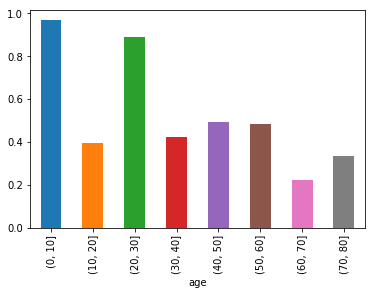

In [7]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

titanic_df.head()

titanic_df['survived'].mean()

titanic_df.groupby('pclass').mean()
#
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

class_sex_grouping['survived'].plot.bar()
#
group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()
#
#Preparing The Data
#
titanic_df.count()
titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)

titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")

titanic_df = titanic_df.dropna()

titanic_df.count()
#
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df
#


In [8]:
processed_df = preprocess_titanic_df(titanic_df)
#
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)
#
# Decision Tree
#
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)
#
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))
#
test_classifier(clf_dt)
#
# Random Forest
#
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)
#
# Gradient Boosting
#
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)
# Voting
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)


Accuracy: 0.7730 (+/- 0.02)
Accuracy: 0.7811 (+/- 0.02)
Accuracy: 0.8201 (+/- 0.02)


/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

Accuracy: 0.8055 (+/- 0.02)


/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [9]:
##################################################
#
clf_rf.fit(X_train, y_train)
test_preds_rf = clf_rf.predict(X=X_test)

clf_gb.fit(X_train, y_train)
test_preds_gb = clf_gb.predict(X=X_test)

eclf.fit(X_train, y_train)
test_preds_vt = eclf.predict(X=X_test)

#
##################################################
# dnn
##################################################
feature_columns = learn.infer_real_valued_columns_from_input(X_train)
feature_columns = learn.infer_real_valued_columns_from_input(X_test)

tf_clf_dnn = skflow.DNNClassifier(hidden_units=[20, 40, 20], n_classes=2, feature_columns=feature_columns)

tf_clf_dnn.fit(X_train, y_train, batch_size=256, steps=1000)

predictions_ = list(tf_clf_dnn.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions_)
print("Accuracy: %f" % score)


#


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_task_id': 0, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpeq47cq43', '_save_checkpoints_secs': 600, '_master': '', '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f874e13dda0>, '_session_config': None, '_num_ps_replicas': 0}


/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpeq47cq43/model.ckpt.
INFO:tensorflow:loss = 0.7381485, step = 1
INFO:tensorflow:global_step/sec: 507.524
INFO:tensorflow:loss = 0.5756264, step = 101 (0.196 sec)
INFO:tensorflow:global_step/sec: 609.629
INFO:tensorflow:loss = 0.6112933, step = 201 (0.164 sec)
INFO:tensorflow:global_step/sec: 717.515
INFO:tensorflow:loss = 0.5627967, step = 301 (0.140 sec)
INFO:tensorflow:global_step/sec: 738.754
INFO:tensorflow:loss = 0.5506449, step = 401 (0.136 sec)
INFO:tensorflow:global_step/sec: 682.152
INFO:tensorflow:loss = 0.59874904, step = 501 (0.145 sec)
INFO:tensorflow:global_step/sec: 684.84
INFO:tensorflow:loss = 0.47478202, step = 601 (0.148 sec)
INFO:tensorflow:global_step/sec: 647.214
INFO:tensorflow:loss = 0.44027254, step = 701 (0.153 sec)
INFO:tensorflow:global_step/sec: 624.961
INFO:tensorflow:loss = 0.44189247, step = 801 (0.160 sec)
INFO:tensorflow:global_step/sec: 760.44
INFO:tensor

In [10]:
# Create a submission # DNN see below
submission = pd.DataFrame({"Actual" : y_test,
                           "Pred_rf": test_preds_rf,
                           "Pred_gb": test_preds_gb,
                           "Pred_vt": test_preds_vt,
                           "Pred_dnn":predictions_})


In [11]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 

Using TensorFlow backend.


In [12]:
#Loading The CIFAR-10 Dataset in Keras

# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [13]:

# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


In [14]:
#
# MNIST For ML Beginners
#
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf

# Create the model

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss and optimizer

y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Train

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  
# Test trained model

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

0.9078


In [15]:
##
#MNIST For ML Experts
##
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())
y = tf.matmul(x,W) + b
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
  

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.9204


In [16]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
  
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


In [17]:
'''
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(400):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
'''

'\ncross_entropy = tf.reduce_mean(\n    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))\ntrain_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)\ncorrect_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))\naccuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))\nsess.run(tf.global_variables_initializer())\nfor i in range(400):\n  batch = mnist.train.next_batch(50)\n  if i%100 == 0:\n    train_accuracy = accuracy.eval(feed_dict={\n        x:batch[0], y_: batch[1], keep_prob: 1.0})\n    print("step %d, training accuracy %g"%(i, train_accuracy))\n  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})\n\nprint("test accuracy %g"%accuracy.eval(feed_dict={\n    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))\n'

In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

import mglearn


In [19]:
############################# Working directory
import os;
os.chdir("/home/cesare/Documents/1-A167081513256-CSV/")

In [20]:
print (os.getcwd());
############################# Reading the dataset in a dataframe using Pandas
print('Python3: Chinese characters in csv file need to be removed!!! \n')
df_B = pd.read_csv("Single_Blue_064.csv",header=None)
#df_B = df_B.loc[0:127,0:71]
############################# Summarizing and Computing Descriptive Statistics
df_B.describe()

/home/cesare/Documents/1-A167081513256-CSV
Python3: Chinese characters in csv file need to be removed!!! 



,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,...,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,1.040620,1.163859,1.146075,1.178466,1.163667,1.196759,1.182290,1.210540,1.192939,1.232365,...,1.365950,1.396796,1.357146,1.375284,1.338937,1.353590,1.313933,1.310307,1.249532,1.012610
std,0.310651,0.329385,0.334138,0.341057,0.334519,0.347153,0.340418,0.341559,0.343046,0.347047,...,0.394727,0.405909,0.401702,0.398314,0.384667,0.387028,0.377439,0.375556,0.354176,0.297931
min,0.451520,0.538590,0.533730,0.518770,0.556660,0.499090,0.545750,0.605590,0.300280,0.608400,...,0.596470,0.620970,0.577250,0.630840,0.628440,0.566150,0.631050,0.634770,0.554230,0.403430
25%,0.771207,0.879730,0.850450,0.890822,0.870792,0.900272,0.885323,0.919532,0.885775,0.927968,...,1.030525,1.051475,1.020950,1.037800,1.007025,1.033100,1.000725,0.995107,0.952235,0.763872
50%,1.030500,1.138450,1.136500,1.165250,1.141200,1.188650,1.172000,1.191650,1.184000,1.225550,...,1.344250,1.385600,1.339250,1.352150,1.319300,1.325650,1.287250,1.292500,1.223900,1.001200
75%,1.280050,1.398950,1.417850,1.431125,1.385150,1.446000,1.423300,1.440950,1.442700,1.473325,...,1.640400,1.665975,1.617400,1.638625,1.601750,1.633125,1.561900,1.568375,1.486150,1.210750
max,1.922500,2.058100,2.088300,2.315800,2.122000,2.557300,2.265800,2.277100,2.265600,2.310400,...,2.504000,2.575600,2.737900,2.554300,2.512400,2.622700,2.410000,2.823000,2.272100,1.998500


1.441889197200521

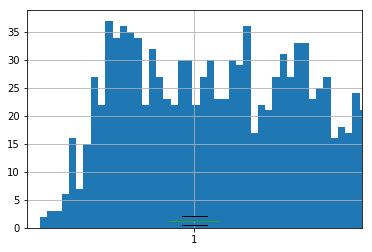

In [21]:
#
df_B.shape
df_B.size
m=len(df_B)
m
n=len(df_B.columns)
n
#
df_B.iloc[:,0:].values
df_B.iloc[:, 1].hist(bins=70)
df_B.boxplot(column=1)
#
# Return the number of missing values per column
df_B.apply(lambda x: sum(x.isnull()),axis=0) 
df_B.isnull().sum()
#
# Return the mean per column (axis=0)
df_column_mean = df_B.mean(axis=0)
#df_column_mean = df_B.mean(axis=1)
df_column_mean
# Select a cut off in order to separate data into binary
cut_off = df_column_mean.mean()
cut_off
#
############################# Binary 

In [22]:
#
#df_B[19][22] == df_B.loc[22,19]
#
X=np.zeros((df_B.size,2))
Y=np.zeros(df_B.size)
#
for i in range(len(df_B)):
    for j in range(len(df_B.columns)):
        X[j+i*720]=[i,j]
        if df_B.loc[i,j] >= cut_off:
            Y[j+i*720]=1
        else:
            Y[j+i*720]=0
#
#
X
Y
Y=Y.astype(np.integer)

In [23]:
############################# Binary data (Numpy) - James
#
raw_data = np.loadtxt("Single_Blue_064.csv", delimiter=",")
#raw_data = raw_data[0:128,0:72]

X=np.zeros((raw_data.size,2))
Y=np.zeros(raw_data.size)           
avg=np.mean(raw_data)
avg


for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        X[j+i*720]=[i,j]
        if raw_data[i,j]>avg:
            Y[j+i*720]=1
        else:
            Y[j+i*720]=0

'''
for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        X[j+i*72]=[i,j]
        if raw_data[i,j]>avg:
            Y[j+i*72]=1
        else:
            Y[j+i*72]=0
'''
        
print(raw_data.shape)
print(X)
print(Y)
X
Y
Y=Y.astype(np.integer)
############################# Binary data (Numpy) - James

(1280, 720)
[[0.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 2.000e+00]
 ...
 [1.279e+03 7.170e+02]
 [1.279e+03 7.180e+02]
 [1.279e+03 7.190e+02]]
[0. 1. 1. ... 0. 0. 0.]


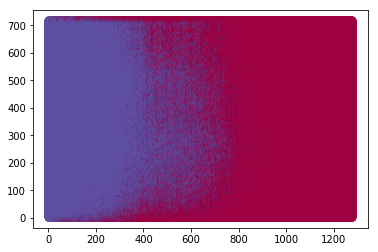

In [24]:
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)


In [25]:
############################# Modeling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
############################# Modeling 
#
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap
#

Text(0,0.5,'Feature 1')

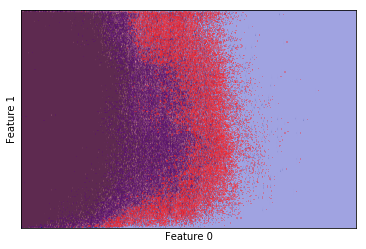

In [26]:
###### KNN
#
knn = KNeighborsClassifier(n_neighbors= 1).fit(X, Y)
#
#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.Spectral)
#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.coolwarm,label='rain')
#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.coolwarm)
#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.bwr)
plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.get_cmap('Blues'))
#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.get_cmap('Dark2'))
#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.RdYlGn)
#plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=custom_div_cmap(numcolors=51, mincol='#01665e', maxcol='#8c510a'))
#
mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=2.5,alpha=.35)
#mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5,alpha=.7)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#

Text(0,0.5,'Feature 1')

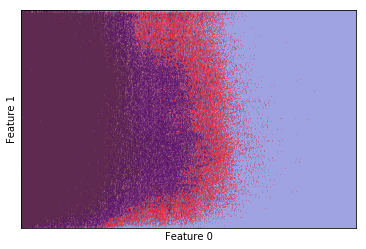

In [27]:
###### Random Forest
#
forest = RandomForestClassifier(n_estimators=5,  random_state=2).fit(X, Y)
#
forest = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1).fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.get_cmap('Blues'))
mglearn.plots.plot_2d_separator(forest, X, fill=True, eps=4.5,alpha=.35)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#
###### Kernelized Support Vector Machines 
#


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 1.176438249
Epoch: 0002 cost= 0.662463268
Epoch: 0003 cost= 0.550717256
Epoch: 0004 cost= 0.496801362
Epoch: 0005 cost= 0.463744727
Epoch: 0006 cost= 0.440960875
Epoch: 0007 cost= 0.423910538
Epoch: 0008 cost= 0.410693034
Epoch: 0009 cost= 0.399906344
Epoch: 0010 cost= 0.390954900
Epoch: 0011 cost= 0.383322986
Epoch: 0012 cost= 0.376781172
Epoch: 0013 cost= 0.371028773
Epoch: 0014 cost= 0.365941240
Epoch: 0015 cost= 0.361391503
Epoch: 0016 cost= 0.357232584
Epoch: 0017 cost= 0.353529507
Epoch: 0018 cost= 0.350169453
Epoch: 0019 cost= 0.346970679
Epoch: 0020 cost= 0.344143716
Epoch: 0021 cost= 0.341479446
Epoch: 0022 cost= 0.338983204
Epoch: 0023 cost= 0.336702177
Epoch: 0024 cost= 0.334510505
Epoch: 0025 

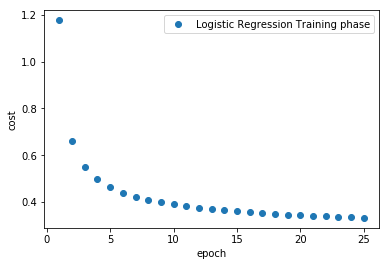

Model accuracy: 0.9142


In [28]:
# Import MINST data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
#
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#
# Parameters
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy,reduction_indices=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

#Plot settings
avg_set = []
epoch_set=[]

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = \
                      mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, \
                     feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, \
                                 feed_dict={x: batch_xs, \
                                            y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print ("Training phase finished")


    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))




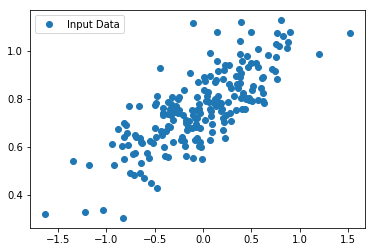

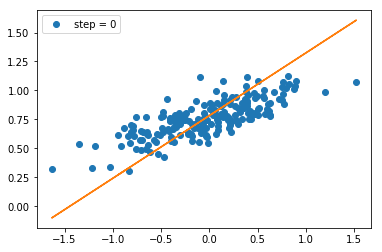

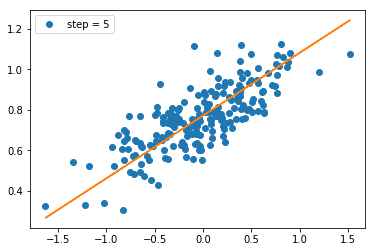

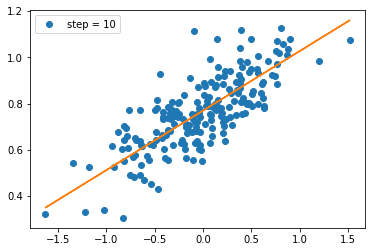

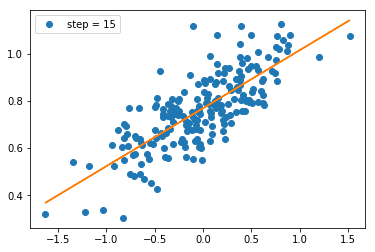

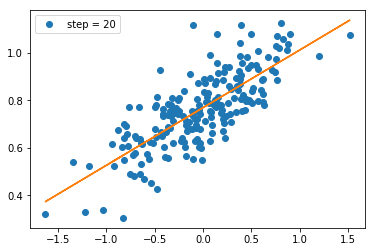

In [29]:
import numpy as np

number_of_points = 200
x_point = []
y_point = []
a = 0.22
b = 0.78
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])


import matplotlib.pyplot as plt

plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend()
plt.show()

import tensorflow as tf


A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = A * x_point + B

cost_function = tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost_function)

model = tf.initialize_all_variables()

with tf.Session() as session:
        session.run(model)
        for step in range(0,21):
                session.run(train)
                if (step % 5) == 0:
                        plt.plot(x_point, y_point,
                                 'o',label='step = {}'.format(step))
                        plt.plot(x_point,
                                 session.run(A) * x_point + session.run(B))
                        plt.legend()
                        plt.show()
                        



LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

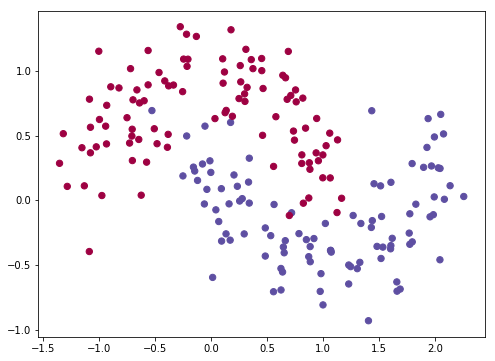

In [30]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# Train the logistic regeression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

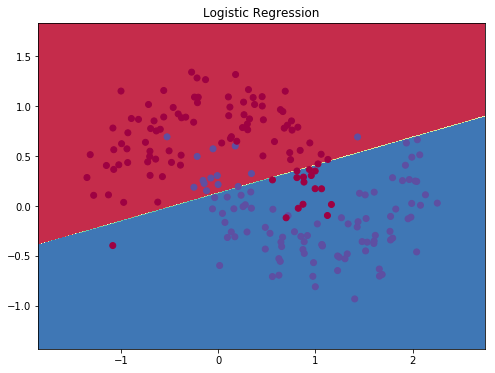

In [31]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")


num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss


# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
        
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model




In [32]:
'''
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")


plt.figure(figsize=(10, 20))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()
'''


'\n# Build a model with a 3-dimensional hidden layer\nmodel = build_model(3, print_loss=True)\n\n# Plot the decision boundary\nplot_decision_boundary(lambda x: predict(model, x))\nplt.title("Decision Boundary for hidden layer size 3")\n\n\nplt.figure(figsize=(10, 20))\nhidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]\nfor i, nn_hdim in enumerate(hidden_layer_dimensions):\n    plt.subplot(5, 2, i+1)\n    plt.title(\'Hidden Layer size %d\' % nn_hdim)\n    model = build_model(nn_hdim)\n    plot_decision_boundary(lambda x: predict(model, x))\nplt.show()\n'

In [33]:
import cv2
print("opencv version: {}".format(cv2.__version__))

opencv version: 3.2.0


# Setup - TF

In [34]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [35]:
import tensorflow as tf

reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [36]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [37]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)


42


In [38]:
sess.close()


In [39]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [40]:
result

42

In [41]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()

In [42]:
result

42

In [43]:
init = tf.global_variables_initializer()


In [44]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)

42


In [45]:
sess.close()


In [46]:
result

42

In [47]:
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [48]:

graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is graph

True

In [49]:
x2.graph is tf.get_default_graph()


False

In [50]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


In [51]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15

10
15


# Linear Regression

## Using the Normal Equation

In [52]:
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

In [53]:
theta_value

array([[-3.7465141e+01],
       [ 4.3573415e-01],
       [ 9.3382923e-03],
       [-1.0662201e-01],
       [ 6.4410698e-01],
       [-4.2513184e-06],
       [-3.7732250e-03],
       [-4.2664889e-01],
       [-4.4051403e-01]], dtype=float32)

In [54]:
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1))

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


## Using Batch Gradient Descent

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [57]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


### Manually computing the gradients

In [58]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145007
Epoch 200 MSE = 0.5667047
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488116
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214705


In [59]:
best_theta


array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393812],
       [-0.04269557],
       [-0.6614528 ],
       [-0.63752776]], dtype=float32)

In [60]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [61]:
gradients = tf.gradients(mse, [theta])[0]


In [62]:
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


In [63]:
def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

In [64]:
my_func(0.2, 0.3)


-0.21253923284754914

In [65]:
reset_graph()

a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

In [66]:
with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(grads))

-0.21253741
[-1.1388494, 0.19671395]


# Using a GradientDescentOptimizer

In [67]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [68]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [69]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


In [70]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [71]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

In [72]:
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [73]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Best theta:
[[ 2.068558  ]
 [ 0.8296286 ]
 [ 0.11875337]
 [-0.26554456]
 [ 0.3057109 ]
 [-0.00450251]
 [-0.03932662]
 [-0.89986444]
 [-0.87052065]]


In [74]:
reset_graph()

A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)

[[6. 7. 8.]]


In [75]:
print(B_val_2)


[[ 9. 10. 11.]
 [12. 13. 14.]]


# Mini-batch Gradient Descent

In [76]:
n_epochs = 1000
learning_rate = 0.01

In [77]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [78]:
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [79]:
n_epochs = 10


In [80]:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [81]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

In [82]:
best_theta


array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

# Visualizing the graph

In [83]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [84]:
show_graph(tf.get_default_graph())


# Using TensorBoard

In [85]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [86]:
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [87]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [88]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [89]:
with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()                                                     # not shown

In [90]:
file_writer.close()


In [91]:
best_theta


array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

# ANN

In [92]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [93]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [94]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [95]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_task_id': 0, '_tf_random_seed': 42, '_task_type': None, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpw96bfvkc', '_save_checkpoints_secs': 600, '_master': '', '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f86bf5a28d0>, '_session_config': None, '_num_ps_replicas': 0}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpw96bfvkc/model.ckpt.
INFO:tensorflow:loss = 2.4005778, step = 1
INFO:tensorflow:global_step/sec: 334.756
INFO:tensorflow:loss = 0.31267592, step = 101 (0.301 sec)
INFO:tensorflow:global_step/sec: 251.956
INFO:tensorflow:loss = 0.29636884, step = 201 (0.396 sec)
I

INFO:tensorflow:global_step/sec: 427.14
INFO:tensorflow:loss = 0.0119402055, step = 7401 (0.234 sec)
INFO:tensorflow:global_step/sec: 375.878
INFO:tensorflow:loss = 0.007149403, step = 7501 (0.276 sec)
INFO:tensorflow:global_step/sec: 364.438
INFO:tensorflow:loss = 0.014467157, step = 7601 (0.277 sec)
INFO:tensorflow:global_step/sec: 402.831
INFO:tensorflow:loss = 0.007830765, step = 7701 (0.236 sec)
INFO:tensorflow:global_step/sec: 456.865
INFO:tensorflow:loss = 0.004113314, step = 7801 (0.220 sec)
INFO:tensorflow:global_step/sec: 422.936
INFO:tensorflow:loss = 0.0049301, step = 7901 (0.235 sec)
INFO:tensorflow:global_step/sec: 386.712
INFO:tensorflow:loss = 0.002556291, step = 8001 (0.259 sec)
INFO:tensorflow:global_step/sec: 395.638
INFO:tensorflow:loss = 0.0063093067, step = 8101 (0.253 sec)
INFO:tensorflow:global_step/sec: 406.679
INFO:tensorflow:loss = 0.03664209, step = 8201 (0.246 sec)
INFO:tensorflow:global_step/sec: 414.247
INFO:tensorflow:loss = 0.027535245, step = 8301 (0.2

INFO:tensorflow:loss = 0.002443798, step = 15401 (0.219 sec)
INFO:tensorflow:global_step/sec: 443.551
INFO:tensorflow:loss = 0.0058893417, step = 15501 (0.224 sec)
INFO:tensorflow:global_step/sec: 422.671
INFO:tensorflow:loss = 0.0037075337, step = 15601 (0.238 sec)
INFO:tensorflow:global_step/sec: 342.421
INFO:tensorflow:loss = 0.0056260703, step = 15701 (0.291 sec)
INFO:tensorflow:global_step/sec: 436.576
INFO:tensorflow:loss = 0.0007602975, step = 15801 (0.230 sec)
INFO:tensorflow:global_step/sec: 446.223
INFO:tensorflow:loss = 0.0009968034, step = 15901 (0.224 sec)
INFO:tensorflow:global_step/sec: 378.414
INFO:tensorflow:loss = 0.0062745614, step = 16001 (0.263 sec)
INFO:tensorflow:global_step/sec: 406.063
INFO:tensorflow:loss = 0.002454545, step = 16101 (0.246 sec)
INFO:tensorflow:global_step/sec: 456.754
INFO:tensorflow:loss = 0.00014431207, step = 16201 (0.220 sec)
INFO:tensorflow:global_step/sec: 460.774
INFO:tensorflow:loss = 0.0026476067, step = 16301 (0.216 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 229.221
INFO:tensorflow:loss = 0.0005636542, step = 23401 (0.439 sec)
INFO:tensorflow:global_step/sec: 245.089
INFO:tensorflow:loss = 0.00077509624, step = 23501 (0.406 sec)
INFO:tensorflow:global_step/sec: 259.642
INFO:tensorflow:loss = 0.0006211653, step = 23601 (0.383 sec)
INFO:tensorflow:global_step/sec: 391.583
INFO:tensorflow:loss = 0.00011435364, step = 23701 (0.254 sec)
INFO:tensorflow:global_step/sec: 310.706
INFO:tensorflow:loss = 0.00081203826, step = 23801 (0.322 sec)
INFO:tensorflow:global_step/sec: 340.2
INFO:tensorflow:loss = 0.001883201, step = 23901 (0.294 sec)
INFO:tensorflow:global_step/sec: 327.469
INFO:tensorflow:loss = 0.0012928279, step = 24001 (0.305 sec)
INFO:tensorflow:global_step/sec: 233.267
INFO:tensorflow:loss = 0.00067438895, step = 24101 (0.434 sec)
INFO:tensorflow:global_step/sec: 232.694
INFO:tensorflow:loss = 0.0017179507, step = 24201 (0.436 sec)
INFO:tensorflow:global_step/sec: 254.371
INFO:tensorflow:loss = 0.000283

INFO:tensorflow:global_step/sec: 457.961
INFO:tensorflow:loss = 0.001537505, step = 31401 (0.212 sec)
INFO:tensorflow:global_step/sec: 449.992
INFO:tensorflow:loss = 0.00018039964, step = 31501 (0.225 sec)
INFO:tensorflow:global_step/sec: 446.846
INFO:tensorflow:loss = 0.00033090624, step = 31601 (0.221 sec)
INFO:tensorflow:global_step/sec: 351.464
INFO:tensorflow:loss = 0.00065389514, step = 31701 (0.284 sec)
INFO:tensorflow:global_step/sec: 476.815
INFO:tensorflow:loss = 0.00016510641, step = 31801 (0.210 sec)
INFO:tensorflow:global_step/sec: 403.161
INFO:tensorflow:loss = 0.0006724696, step = 31901 (0.248 sec)
INFO:tensorflow:global_step/sec: 401.082
INFO:tensorflow:loss = 0.000113991875, step = 32001 (0.249 sec)
INFO:tensorflow:global_step/sec: 452.319
INFO:tensorflow:loss = 0.00041301307, step = 32101 (0.221 sec)
INFO:tensorflow:global_step/sec: 517.886
INFO:tensorflow:loss = 0.0011390031, step = 32201 (0.195 sec)
INFO:tensorflow:global_step/sec: 398.798
INFO:tensorflow:loss = 0.0

INFO:tensorflow:loss = 0.0003701024, step = 39301 (0.388 sec)
INFO:tensorflow:global_step/sec: 287.661
INFO:tensorflow:loss = 0.00043471632, step = 39401 (0.348 sec)
INFO:tensorflow:global_step/sec: 388.796
INFO:tensorflow:loss = 0.0001589904, step = 39501 (0.257 sec)
INFO:tensorflow:global_step/sec: 399.277
INFO:tensorflow:loss = 0.0007199554, step = 39601 (0.250 sec)
INFO:tensorflow:global_step/sec: 455.405
INFO:tensorflow:loss = 0.00015482325, step = 39701 (0.221 sec)
INFO:tensorflow:global_step/sec: 466.209
INFO:tensorflow:loss = 0.0011649998, step = 39801 (0.213 sec)
INFO:tensorflow:global_step/sec: 434.423
INFO:tensorflow:loss = 0.0008285186, step = 39901 (0.230 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /tmp/tmpw96bfvkc/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0003867582.


SKCompat()

In [96]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])


INFO:tensorflow:Restoring parameters from /tmp/tmpw96bfvkc/model.ckpt-40000


0.984

In [97]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07070503412125431

# Using plain TensorFlow

In [98]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [99]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [100]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [101]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [102]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [103]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [104]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [105]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [106]:
n_epochs = 10
batch_size = 50

In [107]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Val accuracy: 0.9146
1 Train accuracy: 0.94 Val accuracy: 0.9352
2 Train accuracy: 0.92 Val accuracy: 0.9466
3 Train accuracy: 0.96 Val accuracy: 0.951
4 Train accuracy: 0.92 Val accuracy: 0.9586
5 Train accuracy: 0.94 Val accuracy: 0.958
6 Train accuracy: 0.98 Val accuracy: 0.9608
7 Train accuracy: 0.96 Val accuracy: 0.9636
8 Train accuracy: 0.92 Val accuracy: 0.9638
9 Train accuracy: 0.96 Val accuracy: 0.9648


In [108]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [109]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
